# Noise and Decoherence

This notebook will illustrate the impact of Noise and Decoherence on our Quantum applications.

## Noise

In quantum computing, noise refers to unwanted interactions between qubits and their environment, leading to errors in computation. Real quantum computers are affected by noise, which is why quantum error correction is so important.

In this first example, we will explore the concept of noise by simulating a simple bit-flip noise model. We'll perform a basic quantum operation - preparing a qubit in the |0⟩ state and measuring it - both with and without noise.

Simple circuit without noise:


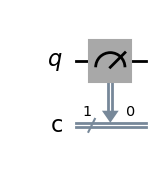

Results without noise (perfect simulator):


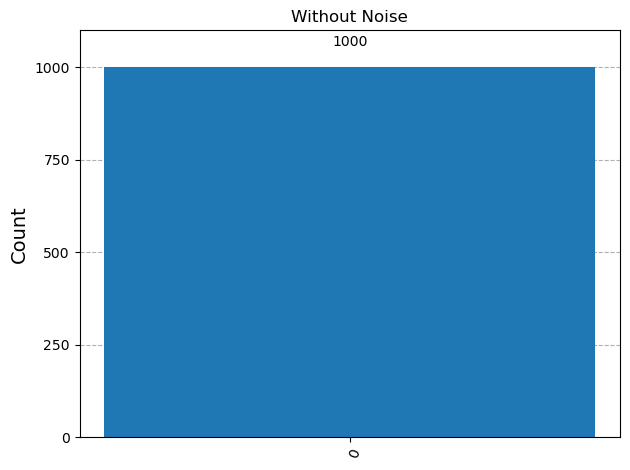


Noise model details:
Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
Error types:
- Measurement: 5% probability of bit-flip
- Single-qubit gates: 2% probability of depolarizing error

Results with noise:


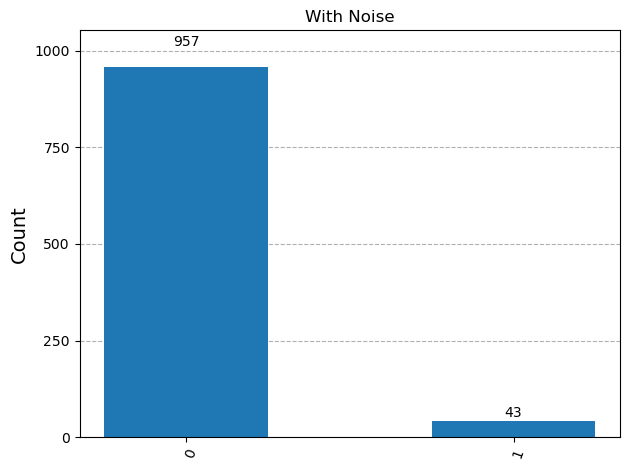


Comparison:
Perfect simulation: {'0': 1000}
Noisy simulation: {'0': 957, '1': 43}

Notice that with noise, we sometimes get |1⟩ results even though
we never explicitly put the qubit in the |1⟩ state!
This demonstrates how noise can cause bit-flip errors in quantum computers.


In [6]:
# Import necessary packages
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel, pauli_error, depolarizing_error

# First, let's run a simple circuit without any noise
# Create a circuit with 1 qubit and 1 classical bit
clean_circuit = QuantumCircuit(1, 1)

# Measure the qubit (should give |0⟩ state with 100% probability)
clean_circuit.measure(0, 0)

# Draw the circuit
print("Simple circuit without noise:")
display(clean_circuit.draw('mpl'))

# Run the circuit on a perfect simulator
perfect_backend = Aer.get_backend('qasm_simulator')
perfect_job = perfect_backend.run(clean_circuit, shots=1000)
perfect_result = perfect_job.result()
perfect_counts = perfect_result.get_counts()

# Display the results
print("Results without noise (perfect simulator):")
display(plot_histogram(perfect_counts, title="Without Noise"))

# Now let's add noise to our simulation
# We'll create a simple custom noise model instead of using a pre-defined one
noise_model = NoiseModel()

# Add bit-flip error to measurements (this causes the |0⟩ state to sometimes be measured as |1⟩)
# The error probability is 5% (0.05)
bit_flip = pauli_error([('X', 0.05), ('I', 0.95)])
noise_model.add_all_qubit_quantum_error(bit_flip, "measure")

# Add depolarizing error to single-qubit gates
# This causes the qubit state to be randomly rotated with some probability
depolarizing = depolarizing_error(0.02, 1)  # 2% error rate, 1-qubit gate
noise_model.add_all_qubit_quantum_error(depolarizing, ["u1", "u2", "u3"])

# Print some information about the noise model
print("\nNoise model details:")
print(f"Basis gates: {noise_model.basis_gates}")
print("Error types:")
print("- Measurement: 5% probability of bit-flip")
print("- Single-qubit gates: 2% probability of depolarizing error")

# Run the same circuit but with the noise model
noisy_backend = Aer.get_backend('qasm_simulator')
noisy_job = noisy_backend.run(
    clean_circuit,
    noise_model=noise_model,
    shots=1000
)
noisy_result = noisy_job.result()
noisy_counts = noisy_result.get_counts()

# Display the results
print("\nResults with noise:")
display(plot_histogram(noisy_counts, title="With Noise"))

# Compare the results
print("\nComparison:")
print(f"Perfect simulation: {perfect_counts}")
print(f"Noisy simulation: {noisy_counts}")
print("\nNotice that with noise, we sometimes get |1⟩ results even though")
print("we never explicitly put the qubit in the |1⟩ state!")
print("This demonstrates how noise can cause bit-flip errors in quantum computers.")

### Note on Quantum Error Models

In the bit-flip error model definition:
```python
bit_flip = pauli_error([('X', 0.05), ('I', 0.95)])
```

The 'I' refers to the Identity operator in quantum computing, not the letter "I" or a variable. Here's what each component means:

1. **X**: This is the Pauli-X gate (quantum NOT gate), which flips a qubit from |0⟩ to |1⟩ or vice versa
   - With probability 0.05 (5%), this error will apply an X gate, causing a bit flip

2. **I**: This is the Identity operator, which leaves the qubit unchanged
   - With probability 0.95 (95%), this "error" applies an Identity operation, meaning no actual error occurs

In quantum error models, we must specify the complete set of possible operations and their probabilities, which must sum to 1. The 95% probability of the Identity operation simply means "95% chance of no error occurring."

This error model is saying: "When measuring a qubit, there's a 5% chance its value will be flipped, and a 95% chance it will be measured correctly."

The Identity operator is fundamental in quantum mechanics - it's the "do nothing" operation that preserves the quantum state exactly as it is.

## Understanding the Impact of Noise

In the example above, we saw how noise affects even the simplest quantum operation - measuring a qubit in its initial state. Without noise, we always get |0⟩ (since that's the default initial state). But with noise, we sometimes get |1⟩ results.

Let's try a slightly more complex circuit to see how noise affects quantum computations that involve gates.

Hadamard circuit:


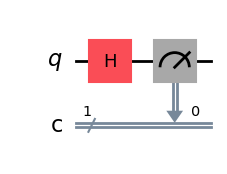

Results without noise:


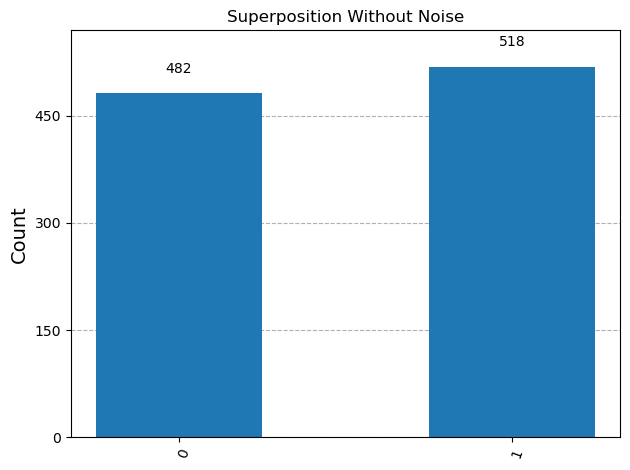


Results with noise:


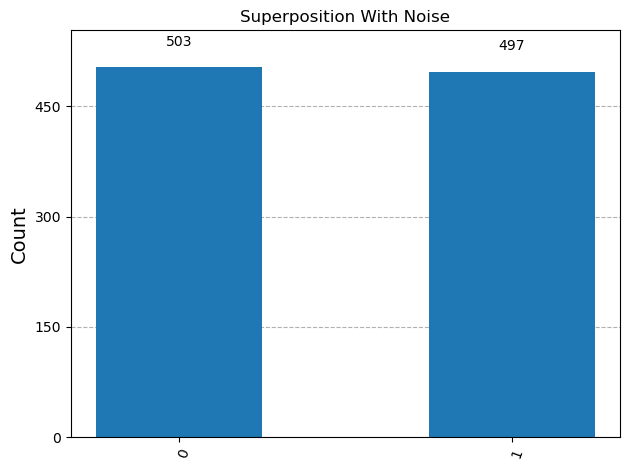


Probability analysis:
Perfect simulation: |0⟩: 0.482, |1⟩: 0.518
Noisy simulation: |0⟩: 0.503, |1⟩: 0.497
Deviation from ideal: |0⟩: 0.003, |1⟩: 0.003

Notice that noise can cause the probabilities to deviate from the theoretical 50-50 split!


In [3]:
# Let's create a circuit that prepares a simple superposition with a Hadamard gate
# Then measures the result - should be 50% |0⟩ and 50% |1⟩ in the ideal case

# Create a new circuit
h_circuit = QuantumCircuit(1, 1)

# Apply Hadamard gate to create superposition
h_circuit.h(0)

# Measure the qubit
h_circuit.measure(0, 0)

# Draw the circuit
print("Hadamard circuit:")
display(h_circuit.draw('mpl'))

# Run without noise
h_perfect_job = perfect_backend.run(h_circuit, shots=1000)
h_perfect_result = h_perfect_job.result()
h_perfect_counts = h_perfect_result.get_counts()

# Run with noise
h_noisy_job = noisy_backend.run(
    h_circuit,
    noise_model=noise_model,
    shots=1000
)
h_noisy_result = h_noisy_job.result()
h_noisy_counts = h_noisy_result.get_counts()

# Display and compare the results
print("Results without noise:")
display(plot_histogram(h_perfect_counts, title="Superposition Without Noise"))

print("\nResults with noise:")
display(plot_histogram(h_noisy_counts, title="Superposition With Noise"))

# Calculate how far the noisy results deviate from the ideal 50-50 split
perfect_prob_0 = h_perfect_counts.get('0', 0) / 1000
perfect_prob_1 = h_perfect_counts.get('1', 0) / 1000

noisy_prob_0 = h_noisy_counts.get('0', 0) / 1000
noisy_prob_1 = h_noisy_counts.get('1', 0) / 1000

print("\nProbability analysis:")
print(f"Perfect simulation: |0⟩: {perfect_prob_0:.3f}, |1⟩: {perfect_prob_1:.3f}")
print(f"Noisy simulation: |0⟩: {noisy_prob_0:.3f}, |1⟩: {noisy_prob_1:.3f}")
print(f"Deviation from ideal: |0⟩: {abs(noisy_prob_0-0.5):.3f}, |1⟩: {abs(noisy_prob_1-0.5):.3f}")
print("\nNotice that noise can cause the probabilities to deviate from the theoretical 50-50 split!")

## Depolarizing Errors on the Bloch Sphere

Earlier, we mentioned that a depolarizing error "randomly transforms a qubit's state toward the maximally mixed state". Let's visualize what this means on the Bloch sphere:

1. **Pure State Representation**: On the Bloch sphere, a pure quantum state is represented by a point on the surface of the sphere. For example:
   - The state |0⟩ is at the north pole
   - The state |1⟩ is at the south pole
   - Superposition states (like those created by the Hadamard gate) are on the equator

2. **Maximally Mixed State**: The maximally mixed state is represented by the point at the center of the Bloch sphere. This state has no coherence or purity - it is a completely random mixture with equal probabilities of all possible outcomes.

3. **Effect of Depolarizing Noise**:
   - Depolarizing noise causes the state vector to shrink toward the center of the Bloch sphere
   - As depolarizing noise increases in strength, the state moves closer to the center
   - In the extreme case of complete depolarization, the state reaches the center of the Bloch sphere, becoming totally mixed

4. **Mathematical Description**: A depolarizing channel with probability p can be described as:
   - With probability (1-p): The qubit state remains unchanged
   - With probability p/3: The X gate is applied
   - With probability p/3: The Y gate is applied
   - With probability p/3: The Z gate is applied

5. **Visual Effect**: If we could watch the evolution of a qubit affected by depolarizing noise over time on the Bloch sphere, we would see its position slowly migrate from the surface toward the center, while also potentially rotating due to the random X, Y, and Z operations.

This "shrinking" of the Bloch vector is what makes depolarizing noise so dangerous in quantum computing - it reduces the purity of quantum states and destroys quantum coherence, which is essential for quantum algorithms to function correctly.

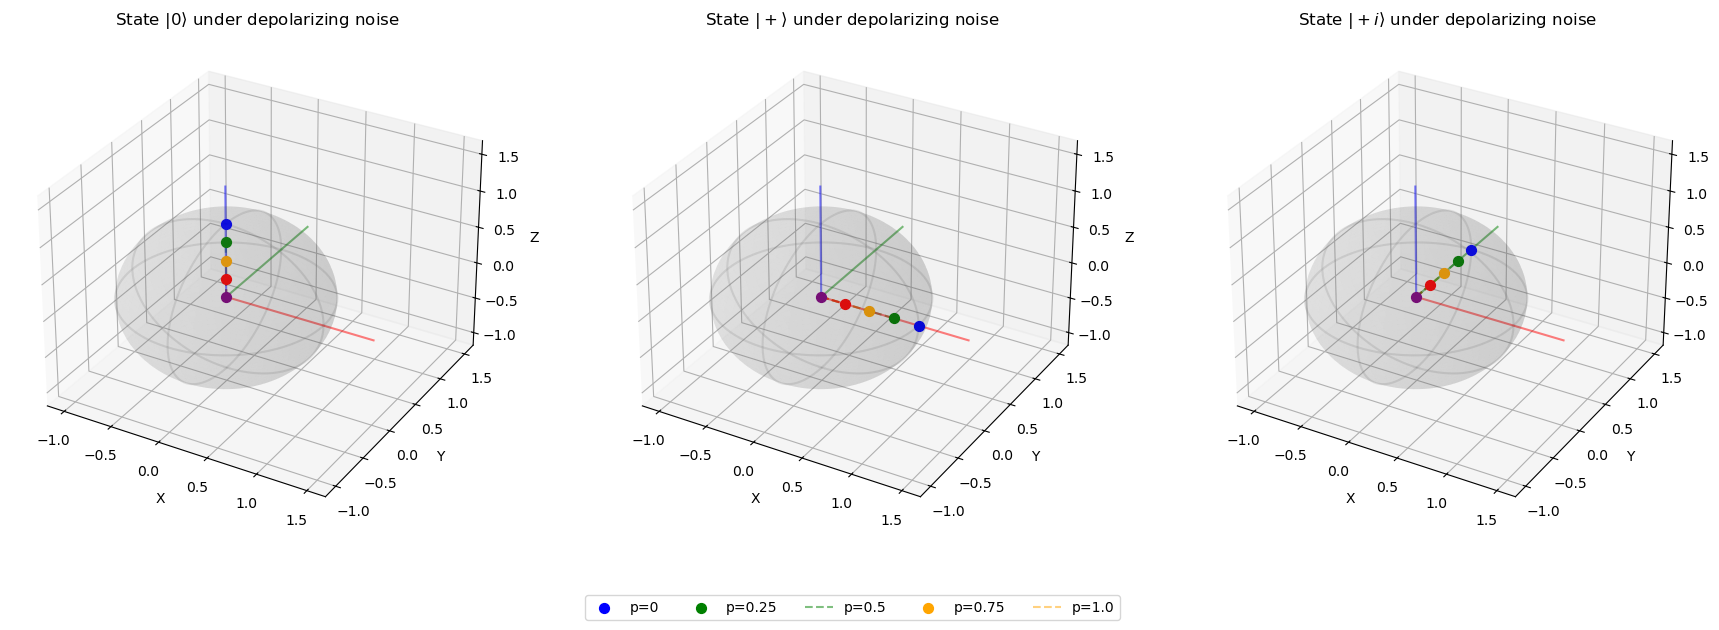

Observations:
1. As depolarizing noise increases (higher p value), the states move closer to the center
2. At p=1.0, all states reach the center point (completely mixed state)
3. The direction of movement is always toward the center, shrinking the Bloch vector
4. This visualization shows why depolarizing noise is often called 'shrinking' noise


In [5]:
# Let's visualize the effect of depolarizing noise on the Bloch sphere
# We'll need the Bloch sphere visualization tools
from qiskit.visualization import plot_bloch_vector
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D for 3D plotting
from qiskit.quantum_info import Statevector
from qiskit_aer.noise import depolarizing_error
from qiskit import QuantumCircuit
from qiskit.quantum_info import state_fidelity

# Create a function to apply depolarizing noise with different strengths
def apply_depolarizing_noise(initial_state, noise_strength):
    """
    Apply depolarizing noise to a quantum state
    
    Args:
        initial_state: Initial quantum state vector [x, y, z]
        noise_strength: Value between 0 and 1 indicating noise strength
        
    Returns:
        Noisy state vector [x', y', z']
    """
    # In the Bloch representation, depolarizing shrinks the vector toward origin
    # by a factor of (1-noise_strength)
    return [(1-noise_strength) * component for component in initial_state]

# Let's demonstrate with a few states
# Create a figure with multiple Bloch spheres
fig = plt.figure(figsize=(18, 6))

# Initial states
states = [
    [0, 0, 1],      # |0⟩ state (north pole)
    [1, 0, 0],      # |+⟩ state (on equator)
    [0, 1, 0]       # |+i⟩ state (on equator)
]
state_names = ["$|0\\rangle$", "$|+\\rangle$", "$|+i\\rangle$"]

# Noise strengths to show
noise_levels = [0, 0.25, 0.5, 0.75, 1.0]
noise_colors = ['blue', 'green', 'orange', 'red', 'purple']

# Create a list to store our 3D axes
axes = []

# Plot each state and its degradation
for i, (state, name) in enumerate(zip(states, state_names)):
    # Create 3D subplot
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    axes.append(ax)
    
    # Plot original and noisy states on the Bloch sphere
    for noise, color in zip(noise_levels, noise_colors):
        noisy_state = apply_depolarizing_noise(state, noise)
        # Convert to spherical coordinates for annotation placement
        r = np.linalg.norm(noisy_state)
        if r > 0:
            # Avoid division by zero
            theta = np.arccos(noisy_state[2]/r) if r > 0 else 0
            phi = np.arctan2(noisy_state[1], noisy_state[0]) if r > 0 else 0
            x = 1.1 * r * np.sin(theta) * np.cos(phi)
            y = 1.1 * r * np.sin(theta) * np.sin(phi)
            z = 1.1 * r * np.cos(theta)
        else:
            x, y, z = 0, 0, 0
            
        # Plot the point
        ax.scatter(noisy_state[0], noisy_state[1], noisy_state[2], 
                   color=color, s=50, label=f'p={noise}')
        
        # Draw line to origin to show the shrinking effect
        if noise > 0:  # Don't draw for the original state
            ax.plot([0, noisy_state[0]], [0, noisy_state[1]], [0, noisy_state[2]], 
                    color=color, linestyle='--', alpha=0.5)
    
    # Set plot properties
    ax.set_title(f'State {name} under depolarizing noise')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Draw the Bloch sphere wireframe
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 1 * np.outer(np.cos(u), np.sin(v))
    y = 1 * np.outer(np.sin(u), np.sin(v))
    z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='gray', alpha=0.1)
    
    # Add wireframe circles for x, y, z planes
    theta = np.linspace(0, 2 * np.pi, 100)
    # XY plane circle
    ax.plot(np.cos(theta), np.sin(theta), np.zeros(100), color='gray', alpha=0.2)
    # XZ plane circle
    ax.plot(np.cos(theta), np.zeros(100), np.sin(theta), color='gray', alpha=0.2)
    # YZ plane circle
    ax.plot(np.zeros(100), np.cos(theta), np.sin(theta), color='gray', alpha=0.2)

    # Show x, y, z axes
    ax.plot([0, 1.5], [0, 0], [0, 0], color='red', alpha=0.5)   # x-axis
    ax.plot([0, 0], [0, 1.5], [0, 0], color='green', alpha=0.5) # y-axis
    ax.plot([0, 0], [0, 0], [0, 1.5], color='blue', alpha=0.5)  # z-axis

# Add a common legend
legend_labels = [f'p={p}' for p in noise_levels]
fig.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=5)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for the legend
plt.show()

print("Observations:")
print("1. As depolarizing noise increases (higher p value), the states move closer to the center")
print("2. At p=1.0, all states reach the center point (completely mixed state)")
print("3. The direction of movement is always toward the center, shrinking the Bloch vector")
print("4. This visualization shows why depolarizing noise is often called 'shrinking' noise")